<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/give_headig_and_maturity_1x1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sowing Points: 
Heading Points: 12/26/2021
Maturity Points: 3/21/2022
Tillering Points: 11/21/2021, 2/19/2022


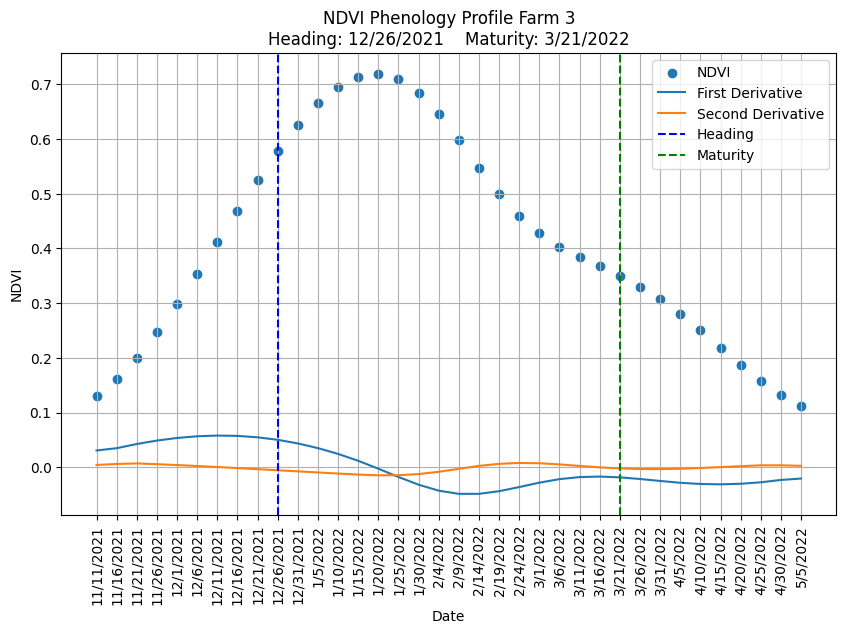

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Your NDVI data
data = pd.read_csv('/content/one_season_farm3.csv')
dates = data['Date'].tolist()
ndvi = data['NDVI'].tolist()

# Smoothing the data using a moving average
window_size = 5
smoothed_ndvi = np.convolve(ndvi, np.ones(window_size)/window_size, mode='valid')

# Compute the first and second derivatives
first_derivative = np.gradient(smoothed_ndvi)
second_derivative = np.gradient(first_derivative)

# Find zero crossings in derivatives
first_derivative_zero_crossings = np.where(np.diff(np.sign(first_derivative)))[0]
second_derivative_zero_crossings = np.where(np.diff(np.sign(second_derivative)))[0]

# Define threshold values for classification
sowing_threshold = 0
heading_threshold = 0
maturity_threshold = 0
tillering_threshold = 0

# Identify points
# sowing_points = [dates[i] for i in first_derivative_zero_crossings if first_derivative[i] < sowing_threshold]
# heading_points = [dates[i] for i in first_derivative_zero_crossings if first_derivative[i] > heading_threshold]
# maturity_points = [dates[i] for i in second_derivative_zero_crossings if second_derivative[i] < maturity_threshold]
# tillering_points = [dates[i] for i in second_derivative_zero_crossings if second_derivative[i] > tillering_threshold]

# # Print and plot the results
# print("Sowing Points:", sowing_points)
# print("Heading Points:", heading_points)
# print("Maturity Points:", maturity_points)
# print("Tillering Points:", tillering_points)


#######3
# Identify points
sowing_points = [dates[i] for i in first_derivative_zero_crossings if first_derivative[i - 1] < sowing_threshold]
heading_points = [dates[i] for i in first_derivative_zero_crossings if first_derivative[i - 1] > heading_threshold]

# Initialize maturity_points to an empty list
maturity_points = []

# Find and store the last maturity point
for i in reversed(second_derivative_zero_crossings):
    if second_derivative[i - 1] < maturity_threshold:
        maturity_points.append(dates[i])
        break
tillering_points = [dates[i] for i in second_derivative_zero_crossings if second_derivative[i - 1] > tillering_threshold]

# Print and plot the results
print("Sowing Points:", ', '.join(sowing_points))
print("Heading Points:", ', '.join(heading_points))
print("Maturity Points:", ', '.join(maturity_points))
print("Tillering Points:", ', '.join(tillering_points))

########33


plt.figure(figsize=(10, 6))
plt.scatter(dates[window_size - 1:], smoothed_ndvi, label='NDVI')
plt.plot(dates[window_size - 1:], first_derivative, label='First Derivative')
plt.plot(dates[window_size - 1:], second_derivative, label='Second Derivative')

# Add vertical lines to highlight heading and maturity points
for date in heading_points:
    plt.axvline(x=date, color='blue', linestyle='--', label='Heading')
for date in maturity_points:
    plt.axvline(x=date, color='green', linestyle='--', label='Maturity')

#plt.title(f"NDVI Phenology Profile Farm 4\n{heading_points} to Heading Points:, ', '.join({heading_points})")
plt.title(f'NDVI Phenology Profile Farm 3\nHeading: {", ".join(heading_points)}    Maturity: {", ".join(maturity_points)}')


######


############
plt.xlabel('Date')
plt.ylabel('NDVI')
#plt.title('NDVI Stages Farm 1')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

Sowing Points: []
Heading Points: ['1/20/2022']
Maturity Points: ['3/16/2022']
Tillering Points: ['11/26/2021']


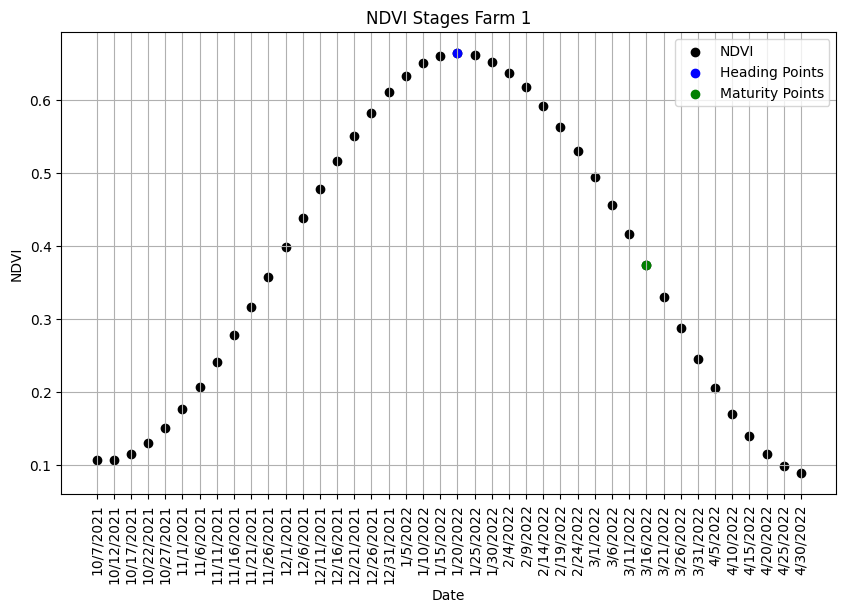

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Your NDVI data
data = pd.read_csv('/content/one_season_farm1.csv')
dates = data['Date'].tolist()
ndvi = data['NDVI'].tolist()

# Convert ndvi to a NumPy array
ndvi = np.array(ndvi)

# Compute the first and second derivatives
first_derivative = ndvi[1:] - ndvi[:-1]
second_derivative = first_derivative[1:] - first_derivative[:-1]

# Find zero crossings in derivatives
first_derivative_zero_crossings = [i for i in range(1, len(first_derivative)) if first_derivative[i - 1] * first_derivative[i] < 0]
second_derivative_zero_crossings = [i for i in range(1, len(second_derivative)) if second_derivative[i - 1] * second_derivative[i] < 0]

# Define threshold values for classification
sowing_threshold = 0
heading_threshold = 0
maturity_threshold = 0
tillering_threshold = 0

# Identify points
sowing_points = [dates[i] for i in first_derivative_zero_crossings if first_derivative[i - 1] < sowing_threshold]
heading_points = [dates[i] for i in first_derivative_zero_crossings if first_derivative[i - 1] > heading_threshold]
maturity_points = [dates[i] for i in second_derivative_zero_crossings if second_derivative[i - 1] < maturity_threshold]
tillering_points = [dates[i] for i in second_derivative_zero_crossings if second_derivative[i - 1] > tillering_threshold]

# Print and plot the results
print("Sowing Points:", sowing_points)
print("Heading Points:", heading_points)
print("Maturity Points:", maturity_points)
print("Tillering Points:", tillering_points)

plt.figure(figsize=(10, 6))
plt.scatter(dates, ndvi, label='NDVI', marker='o', color='black')
plt.scatter(heading_points, [ndvi[dates.index(date)] for date in heading_points], c='blue', label='Heading Points', marker='o')
plt.scatter(maturity_points, [ndvi[dates.index(date)] for date in maturity_points], c='green', label='Maturity Points', marker='o')

plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI Stages Farm 1')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()
